<a href="https://colab.research.google.com/github/infernoman16/ML-works/blob/main/ipl2020_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/infernoman16/learn101/main/Training%20Matches%20IPL%202008-2019.csv?token=AJKWGQKJFSF5APECCV7IH7S754SK4'
df=pd.read_csv(url)

In [ ]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [ ]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
df.drop(["id","season","date","toss_winner","toss_decision","result","dl_applied","win_by_runs","win_by_wickets","umpire3"],axis=1,inplace=True)

In [ ]:
df['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
df.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
df.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)
df.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
df.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [ ]:
df['team1'].value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Rising Pune Supergiants         35
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [ ]:
df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', nan, 'Rajkot', 'Kanpur', 'Mohali',
       'Bengaluru'], dtype=object)

In [ ]:
df.replace('Bangalore','Bengaluru',inplace=True)

In [ ]:
df.loc[df['city'].isnull()]

,city,team1,team2,winner,player_of_match,venue,umpire1,umpire2
402,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
403,NaN,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
407,NaN,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
409,NaN,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
410,NaN,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
415,NaN,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
417,NaN,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [ ]:
df['city'].fillna('Dubai',inplace=True)

In [ ]:
df.dropna(subset=["winner"], inplace=True)
df.dropna(subset=["umpire1"], inplace=True)
df.dropna(subset=["umpire2"], inplace=True)


In [ ]:
df.isnull().sum()

city               0
team1              0
team2              0
winner             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
df.replace({"Mumbai Indians":"MI", "Delhi Capitals":"DC", 
               "Sunrisers Hyderabad":"SRH", "Rajasthan Royals":"RR", 
               "Kolkata Knight Riders":"KKR", "Kings XI Punjab":"KXIP", 
               "Chennai Super Kings":"CSK", "Royal Challengers Bangalore":"RCB",
              "Kochi Tuskers Kerala":"KTK", "Rising Pune Supergiants":"RPS",
              "Gujarat Lions":"GL"}, inplace=True)


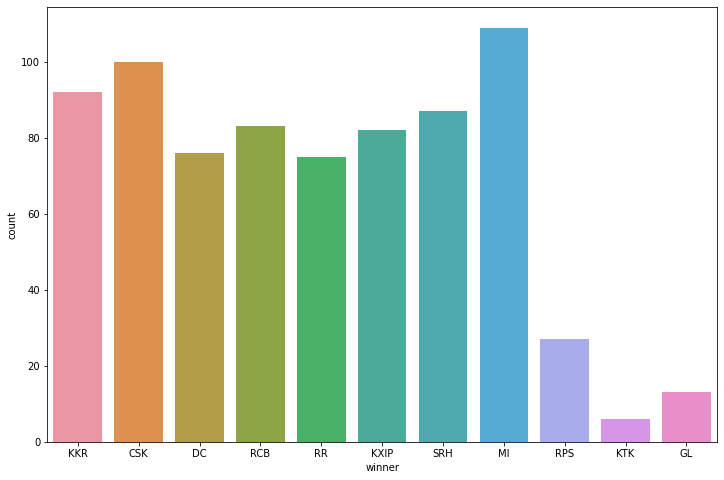

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='winner',data=df)

In [ ]:
train=df.copy()

In [ ]:
train.drop(train.loc[train.team1.isin(['KTK','RPS','GL'])].index, inplace=True)
train.drop(train.loc[train.team2.isin(['KTK','RPS','GL'])].index, inplace=True)


In [ ]:
train.replace({"MI":0,"CSK":1,"RCB":2,
              "KKR":3,"DC":4,"KXIP":5,
              "RR":6,"SRH":7}, inplace=True)


In [ ]:
train["winner"] = np.where(train["winner"] == train["team1"], 1, 0)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

train["city"]=encoder.fit_transform(train["city"])
train["player_of_match"]=encoder.fit_transform(train["player_of_match"])
train["venue"]=encoder.fit_transform(train["venue"])
train["umpire1"]=encoder.fit_transform(train["umpire1"])
train["umpire2"]=encoder.fit_transform(train["umpire2"])


In [ ]:
c=train.corr()
c

,city,team1,team2,winner,player_of_match,venue,umpire1,umpire2
city,1.000000,-0.049319,-0.016093,-0.044073,0.014103,0.088871,-0.065736,0.005562
team1,-0.049319,1.000000,-0.125371,-0.092145,-0.059656,-0.010640,0.000308,-0.072972
team2,-0.016093,-0.125371,1.000000,0.076356,0.007785,0.007488,0.033148,0.067577
winner,-0.044073,-0.092145,0.076356,1.000000,-0.014425,-0.002280,-0.008867,0.095994
player_of_match,0.014103,-0.059656,0.007785,-0.014425,1.000000,0.037519,0.007867,-0.032265
venue,0.088871,-0.010640,0.007488,-0.002280,0.037519,1.000000,-0.037034,0.061509
umpire1,-0.065736,0.000308,0.033148,-0.008867,0.007867,-0.037034,1.000000,0.059578
umpire2,0.005562,-0.072972,0.067577,0.095994,-0.032265,0.061509,0.059578,1.000000


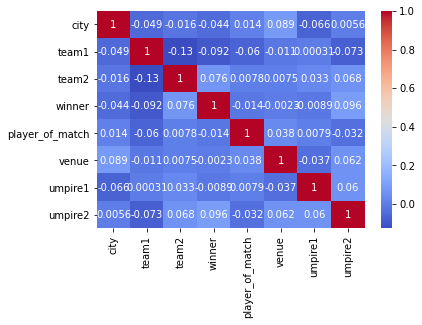

In [ ]:
sns.heatmap(c,annot=True,cmap='coolwarm')

In [ ]:
X = train.drop('winner', axis=1)
y = train['winner']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)


0.6015625

In [ ]:
y_pred = randomForest.predict(X_test)


In [ ]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)*100))


Confusion matrix
 [[55 24]
 [27 22]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        79
           1       0.48      0.45      0.46        49

    accuracy                           0.60       128
   macro avg       0.57      0.57      0.57       128
weighted avg       0.60      0.60      0.60       128

Accuracy of random forest classifier on test set: 60.1562


In [ ]:
url='https://raw.githubusercontent.com/infernoman16/learn101/main/Testset%20Matches%20IPL%202020.csv?token=AJKWGQINA3FWRNUAZ7GIIMS754UO6'
test=pd.read_csv(url)

In [ ]:
test.head()

,id,season,city,date,team1,team2,player_of_match,venue,umpire1,umpire2,umpire3
0,1216492,2020,Abu Dhabi,9/19/2020,MI,CSK,AT Rayudu,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,2020,Dubai (DSC),9/20/2020,DC,KXIP,MP Stoinis,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,2020,Dubai (DSC),9/21/2020,SRH,RCB,YS Chahal,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,2020,Sharjah,9/22/2020,RR,CSK,SV Samson,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,2020,Abu Dhabi,9/23/2020,KKR,MI,RG Sharma,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


In [ ]:
test2 = test.copy()
test2.drop(["id", "season", "date", 
           "umpire3"], axis=1, inplace=True)


In [ ]:
test2.replace({"MI":0,"CSK":1,"RCB":2,
              "KKR":3,"DC":4,"KXIP":5,
              "RR":6,"SRH":7}, inplace=True)


In [ ]:
test2["city"]=encoder.fit_transform(test_copy["city"])
test2["player_of_match"]=encoder.fit_transform(test_copy["player_of_match"])
test2["venue"]=encoder.fit_transform(test_copy["venue"])
test2["umpire1"]=encoder.fit_transform(test_copy["umpire1"])
test2["umpire2"]=encoder.fit_transform(test_copy["umpire2"])


In [ ]:
pred = randomForest.predict(test2)
print(pred)

winner = list()
for i in range(len(pred)):
    if pred[i] == 0:
        winner.append(2)
    else:
        winner.append(1)


[0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
submission = {"id":test.id.tolist(),"winner":winner}
submit = pd.DataFrame(submission)

submit.to_csv("submit.csv", index=False)